In [1]:
from ema_workbench.analysis import parcoords
import pandas as pd
from ema_workbench import load_results
import seaborn as sns
sns.set(rc={'figure.figsize': (30, 14)})

In [2]:
results = load_results('/Users/felicity/PycharmProjects/MisinfoPy/results/exploration_10_scenarios')
exp, out = results

In [3]:
exp

,belief_metric_threshold,high_media_lit,mean_disinformer,mean_normal_user,n_edges,ratio_normal_user,mlit_select,del_t,rank_punish,rank_t,strikes_t,scenario,policy,model
0,41.917471,0.322307,10,1,3,0.998397,0,0,0,0,0,0,all off,MisinfoPy
1,46.983267,0.227960,14,1,3,0.965128,0,0,0,0,0,1,all off,MisinfoPy
2,45.727144,0.368391,6,1,2,0.994620,0,0,0,0,0,2,all off,MisinfoPy
3,59.639426,0.178664,12,2,3,0.989313,0,0,0,0,0,3,all off,MisinfoPy
4,42.040465,0.211427,12,0,2,0.976143,0,0,0,0,0,4,all off,MisinfoPy
5,50.938618,0.345675,8,0,2,0.980022,0,0,0,0,0,5,all off,MisinfoPy
6,55.803332,0.136462,15,2,3,0.964422,0,0,0,0,0,6,all off,MisinfoPy
7,49.440427,0.260241,7,0,2,0.972318,0,0,0,0,0,7,all off,MisinfoPy
8,53.923793,0.099924,5,2,2,0.959426,0,0,0,0,0,8,all off,MisinfoPy
9,57.129053,0.083035,9,1,3,0.953392,0,0,0,0,0,9,all off,MisinfoPy


In [4]:
pd.DataFrame(out)

,n_agents_above_belief_threshold,polarization_variance,engagement,free_speech_constraint,avg_user_effort
0,637,617.28,81112,0.091105,16.34
1,587,659.35,94171,0.272076,10.51
2,587,716.81,56869,0.127831,11.73
3,694,533.27,126902,0.110997,15.25
4,579,725.90,35253,0.270034,4.13
5,529,808.59,36361,0.239660,6.57
6,621,637.87,147854,0.253861,12.55
7,535,833.40,39917,0.295635,5.69
8,537,744.01,103648,0.186948,5.80
9,522,699.29,104691,0.259621,5.50


In [20]:
# Get unique policy names
unique_policies = exp['policy'].unique().tolist()


# Assign each unique policy a color
policy_colors = {}

for _, (policy, color) in enumerate(zip(unique_policies, sns.color_palette())):
    policy_colors[policy] = color

for k, v in policy_colors.items():
    print(k,v)

all off (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
all max (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)


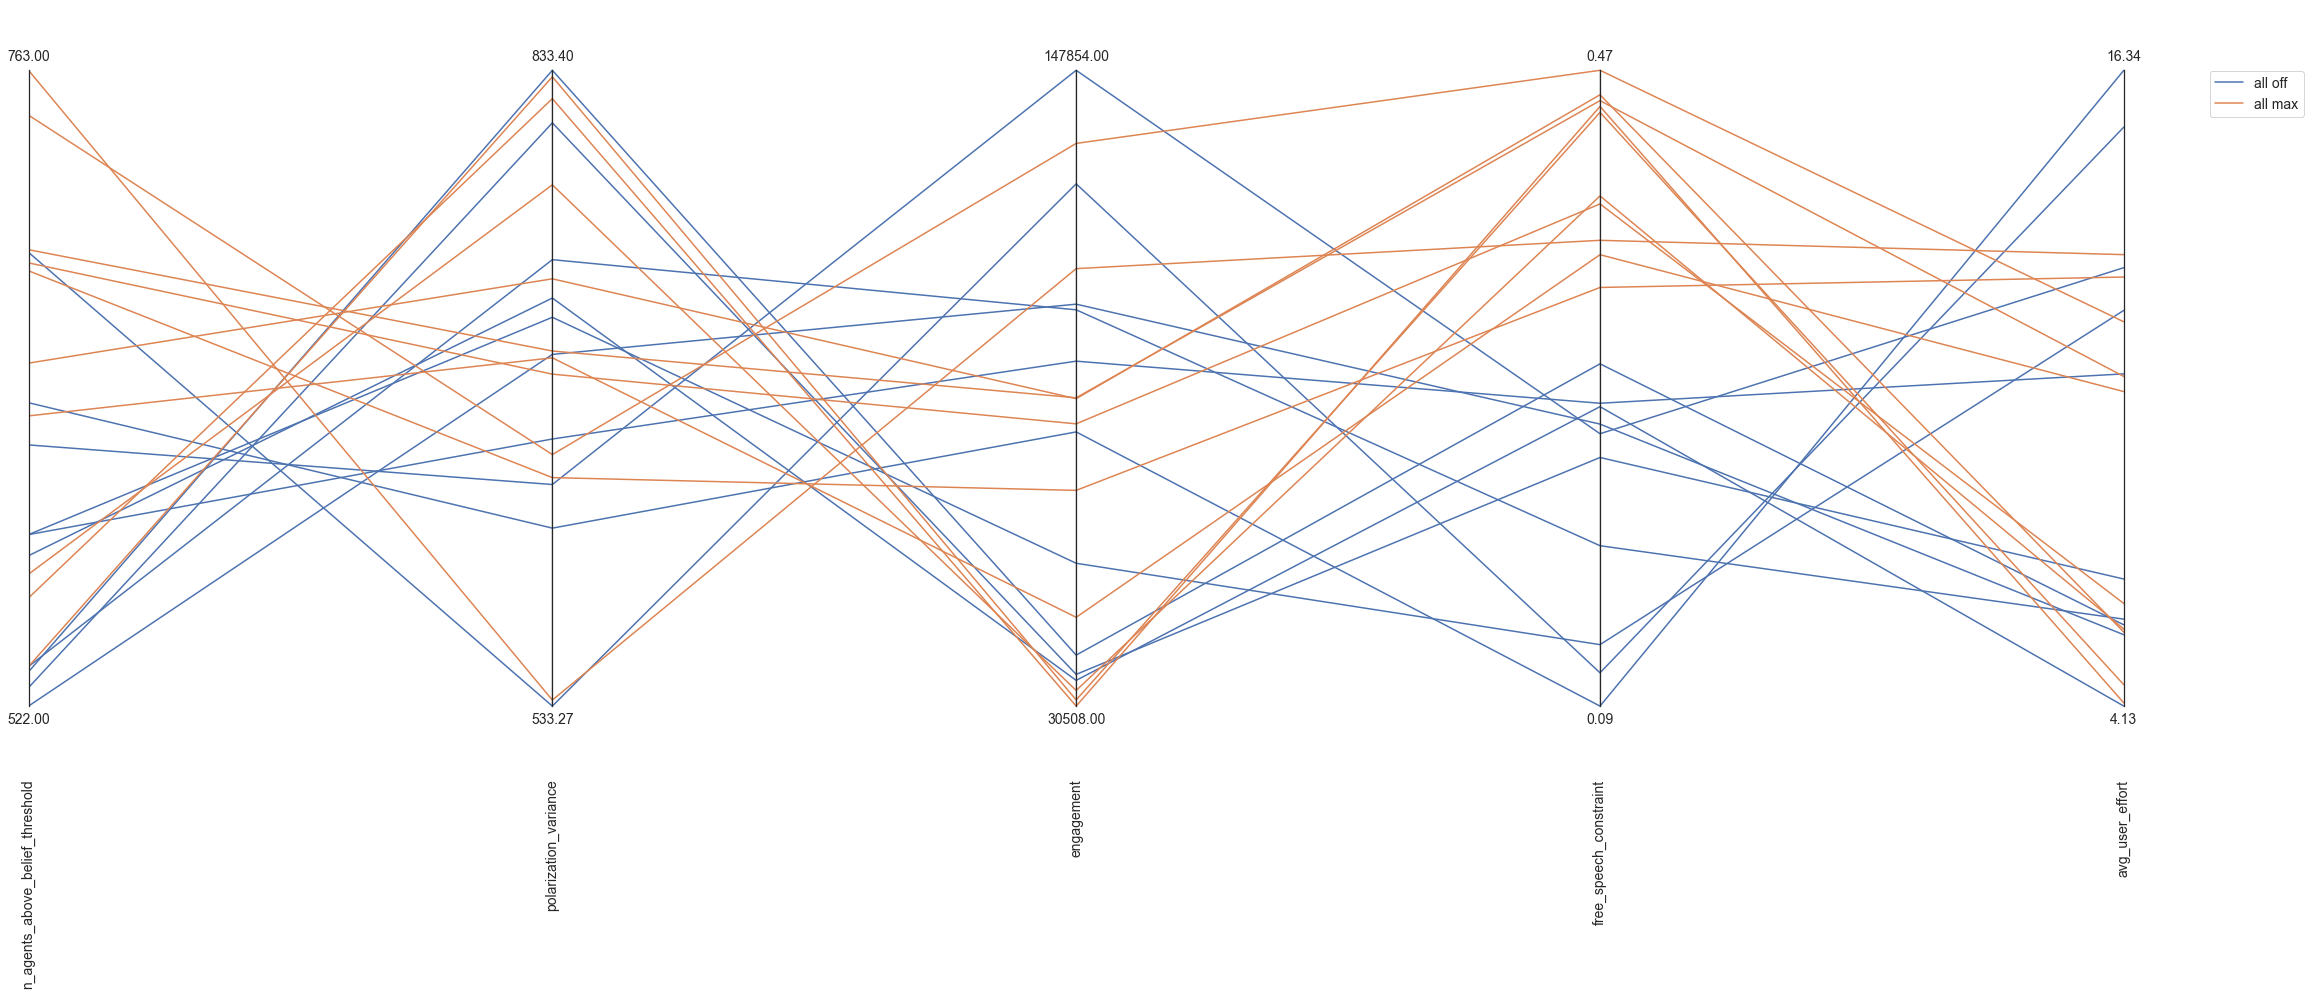

In [21]:
out = pd.DataFrame(out)
limits = parcoords.get_limits(out)
axes = parcoords.ParallelAxes(limits)

# for i, row in out.iterrows():
#     policy_value = exp.loc[i, "policy"]
#     color = policy_colors[policy_value]
#     axes.plot(out, color=color, label=policy_value)

for policy, color in policy_colors.items():
    # policy_value = exp.loc[i, "policy"]
    indices = list(exp[exp['policy'] == policy].index)
    part = out.iloc[indices, :]
    axes.plot(part, color=color, label=policy)

axes.legend()
# for row_id in out.iterrows():




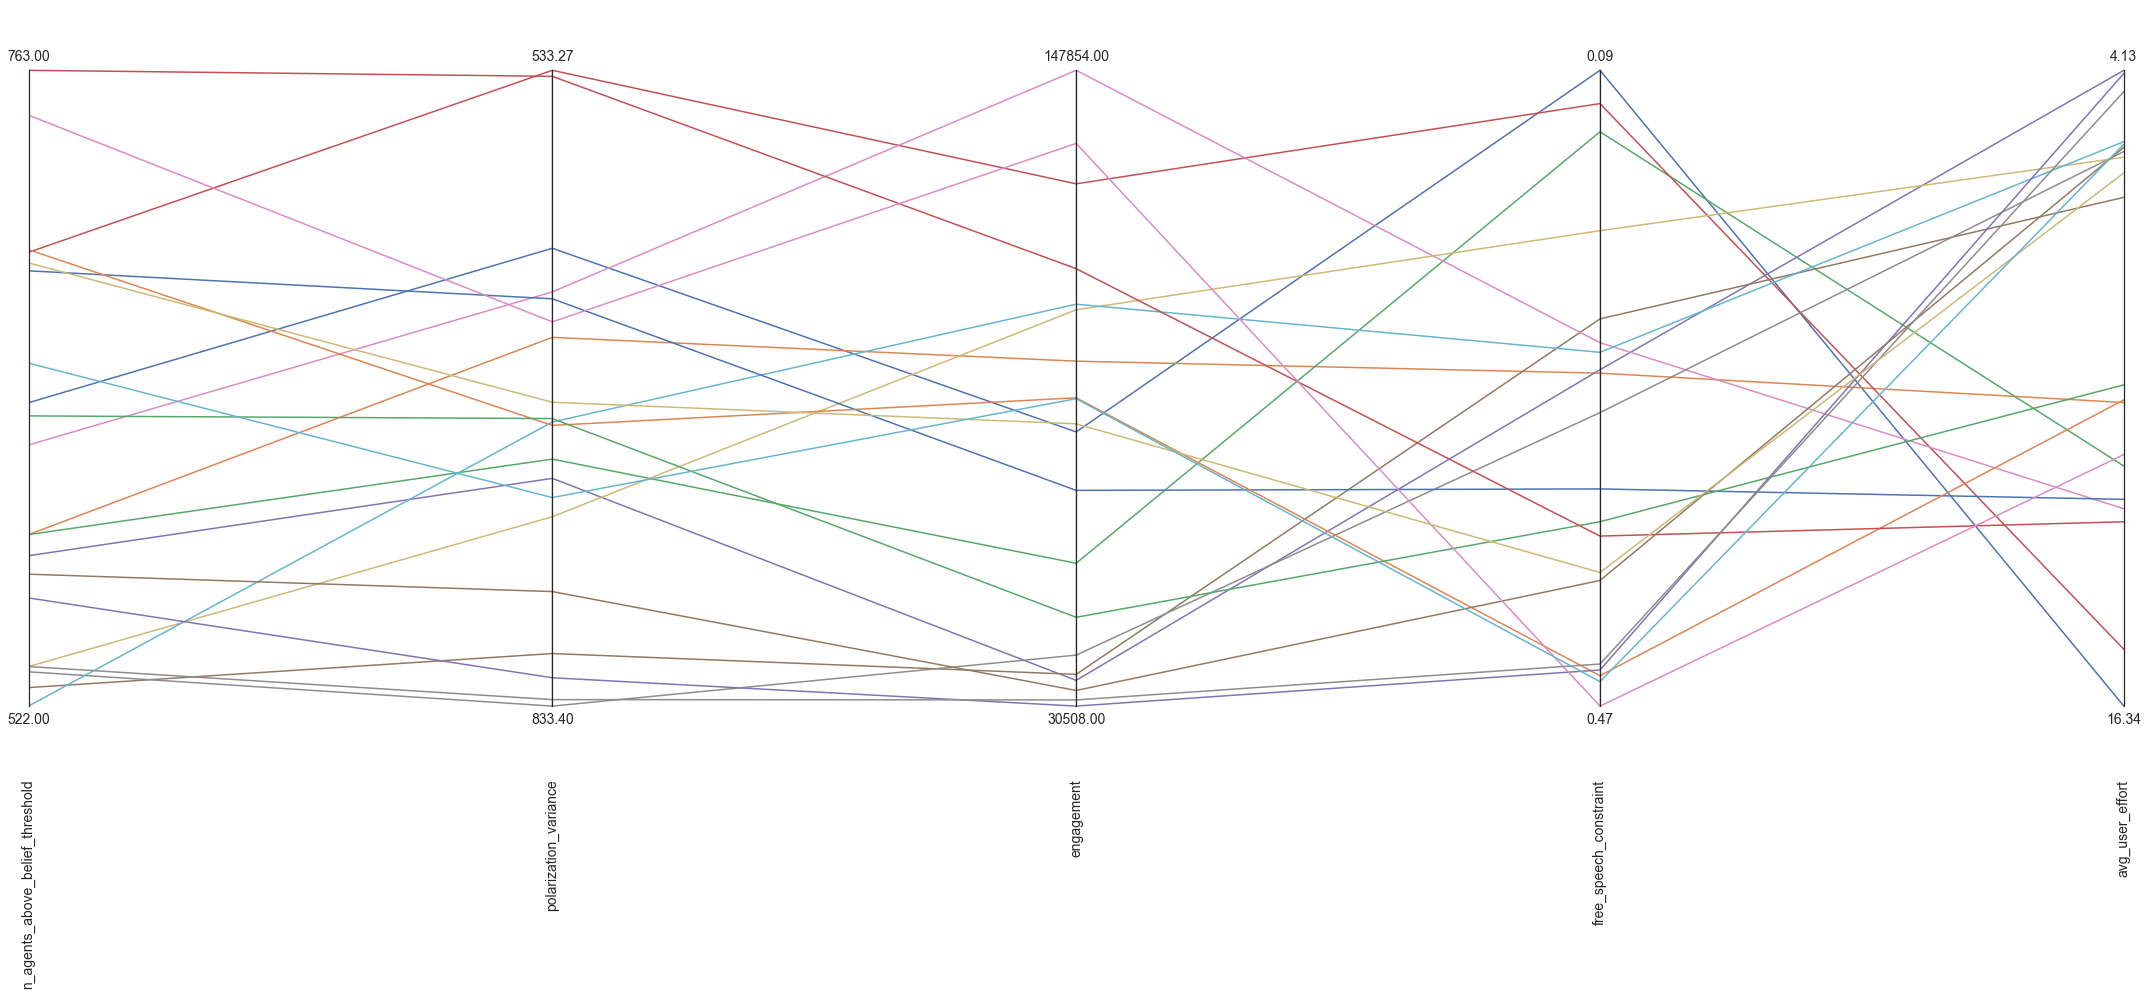

In [7]:
minimize = ['polarization_variance', 'free_speech_constraint', 'avg_user_effort']

out = pd.DataFrame(out)
limits = parcoords.get_limits(out)
axes = parcoords.ParallelAxes(limits)

for metric in minimize:
    axes.invert_axis(metric)
axes.plot(out)